# Analyzing plan for telecom operator Megaline

The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

For analyzing, We have the data of 500 small Megaline client. The data includes who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Our job is to analyze clients' behavior and determine which prepaid plan brings in more revenue.

## Step 1. Open the data file and study the general information. 

In [4]:
# Load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math
import seaborn as sns

#open files
df_calls=pd.read_csv('datasets/megaline_calls.csv')
df_internet=pd.read_csv('datasets/megaline_internet.csv')
df_messages=pd.read_csv('datasets/megaline_messages.csv')
df_plans=pd.read_csv('datasets/megaline_plans.csv')
df_users=pd.read_csv('datasets/megaline_users.csv')

#print general information of the dataframe
df_calls.info()
df_internet.info()
df_messages.info()
df_plans.info()
df_users.info()

#Print some data of each table.
display(df_calls.head())
display(df_internet.head())
display(df_messages.head())
display(df_plans.head())
display(df_users.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dty

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


### Conclusion

1. By using info() method, we checked the general table information like columns name, their datatype and count of null values etc. 
2. All the calls data are loaded in df_calls table, similarly message data in df_messages , internet usage related data in df_internet, plan detail in df_plan and finally user detail in df_users. After excuting info() method, found that all the columns except chrun_date does not contain null values.
3. As shown above data is scatter in multiple tables so after analysing individual table we will first join the required data in one table and then analyze further.

## Step 2. Prepare the data

Before merging all the tables, will identify if there is any invalid data in the individual tables.
<br>
We will check data for null or 0 values in  all the tables as there is no point to include 0 calls or gb used etc. as it will brings no or mininal revenue to the company. 

In [5]:
#checking for null or 0 values in Call_duration table.
print('###############################Call Duration Table#######################################################')
print('Count of null values data',len(df_calls[(df_calls['duration'].isnull())]))
print('Count of 0 values data',len(df_calls[(df_calls['duration']==0)]))
#delete all rows for 0 value data.
df_calls=df_calls[(df_calls['duration']!=0)]
print('After deleting count of data', len(df_calls))


###############################Call Duration Table#######################################################
Count of null values data 0
Count of 0 values data 26834
After deleting count of data 110901


In [6]:
#checking for null or 0 values in Internet table.
print('###############################Internet Table#######################################################')
print('Count of null values data',len(df_internet[(df_internet['mb_used'].isnull())]))
print('Count of null values data',len(df_internet[(df_internet['mb_used']==0)]))
#delete all 0 values data.
df_internet=df_internet[(df_internet['mb_used']!=0)]
print('After deleting count of data', len(df_internet))

###############################Internet Table#######################################################
Count of null values data 0
Count of null values data 13747
After deleting count of data 91078


In [7]:
#checking for null or 0 values in Message table.
print('###############################Message Table#######################################################')
print(len(df_messages[(df_messages['message_date'].isnull())]))
print(len(df_messages[(df_messages['message_date']==0)]))


###############################Message Table#######################################################
0
0


Now check for users table.

In [8]:
#checking for null or 0 values in Users table.
print('###############################Users Table#######################################################')
display(df_users[df_users['user_id'].isnull()])
display(df_users[df_users['first_name'].isnull()])
display(df_users[df_users['last_name'].isnull()])
display(df_users[df_users['age'].isnull()])
display(df_users[df_users['city'].isnull()])
display(df_users[df_users['reg_date'].isnull()])
display(df_users[df_users['plan'].isnull()])
display(df_users[df_users['churn_date'].isnull()])

###############################Users Table#######################################################


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


Found null values only in churn_date column but this is already mention in the requirement that if the value is missing, the calling plan was being used when this data was retrieved so it will stay as it is.
<br>
<br>
Now we will also verify other columns for any invalid data.

In [9]:
print('Min. and Max. age are: {0} and {1}'.format(df_users['age'].min(), df_users['age'].max()))

Min. and Max. age are: 18 and 75


In [10]:
print('Min. and Max. reg_date are: {0} and {1}'.format(df_users['reg_date'].min(), df_users['reg_date'].max()))

Min. and Max. reg_date are: 2018-01-01 and 2018-12-31


In [11]:
df_users['plan'].value_counts()

surf        339
ultimate    161
Name: plan, dtype: int64

We have to also delete the data from calls, Internet and Message table where records in these table exists before the
reg_date and after the churn_date w.r.t to each user. As these records are considered to be invalid because before registration user can't use the service and same after the deregistration.

In [12]:
#display(df_users)

In [13]:
print('Total count before removing invalid calls data: ', len(df_calls))
print('Total count before removing invalid messages data: ', len(df_messages))
print('Total count before removing invalid gb_used data: ', len(df_internet))
for index, row in df_users.iterrows():
    user_id = row['user_id']
    churn_date = row['churn_date']
    reg_date = row['reg_date']
    invalid_calls=df_calls[(df_calls['user_id']==user_id) & ((df_calls['call_date']<reg_date)|(
        df_calls['call_date']>(churn_date if churn_date else df_calls['call_date'])))  
             ]
    invalid_messages=df_messages[(df_messages['user_id']==user_id) & ((df_messages['message_date']<reg_date)|(
        df_messages['message_date']>(churn_date if churn_date else df_messages['message_date'])))  
             ] 
    invalid_gb_used=df_internet[(df_internet['user_id']==user_id) & ((df_internet['session_date']<reg_date)|(
        df_internet['session_date']>(churn_date if churn_date else df_internet['session_date'])))  
             ] 
    
    if (len(invalid_calls)>0):
        #print(str(user_id)+'--'+str(churn_date)+'---'+str(reg_date))
        df_calls.drop(invalid_calls.index,inplace=True)
    if (len(invalid_messages)>0):
        df_messages.drop(invalid_messages.index,inplace=True)
    if (len(invalid_gb_used)>0):
        df_internet.drop(invalid_gb_used.index,inplace=True)

print('Total count after removing invalid calls data: ', len(df_calls))
print('Total count after removing invalid messages data: ', len(df_messages))
print('Total count after removing invalid gb_used data: ', len(df_internet))


Total count before removing invalid calls data:  110901
Total count before removing invalid messages data:  76051
Total count before removing invalid gb_used data:  91078
Total count after removing invalid calls data:  108511
Total count after removing invalid messages data:  74460
Total count after removing invalid gb_used data:  88980


We have removed invalid data from calls, messages and internet table. We calculated the invalid data on basis of chur_date. One think I have noticed here that there are lots of invalid data available in these tables for which duration is also greater than 0 so we need to check with the team how users are able to call after deregistration and who will pay for that?

So far we deleted all invalid data found in the tables. 
<br>
Now we will also incorporate some conditions given so that we can easily make our analysis as per the project requirement.
1. First all individual call duration should be round up to minutes.
2. Also internet usage should be round up from mb to gb. It should be done considering the total for the month not the individual web sessions.
3. For all these tables we also need month column to calculate total revenue monthly.



In [14]:
df_calls['month']=pd.DatetimeIndex(df_calls['call_date']).month#adding month column in the calls table.
df_calls['duration']=df_calls['duration'].apply(np.ceil).astype(int)# all call's seconds are rounded up to minute.

df_internet['month']=pd.DatetimeIndex(df_internet['session_date']).month#adding month column in the internet table.
df_messages['month']=pd.DatetimeIndex(df_messages['message_date']).month#adding month column in the message table.


**Now grouping the data by user_id and month so that we can calculate total call_dutaion, messages and mb used for each month by each user.**

In [15]:
#Create grouped data by users and months.
df_calls_group=df_calls.groupby(['user_id','month']).agg({'duration':['sum'], 'call_date':'count'})
df_internet_group=df_internet.groupby(['user_id','month']).agg({'mb_used':['sum']})
df_messages_group=df_messages.groupby(['user_id','month']).agg({'message_date':['count']})

df_calls_group.columns=['Call_duration','Call_count']
df_internet_group.columns=['mb_used']
df_messages_group.columns=['message_count']

# megabytes rounded up to gigabytes
df_internet_group['gb_used']=df_internet_group['mb_used'].apply(lambda x: math.ceil(x/1024))

display(df_calls_group.head())
display(df_internet_group.head())
display(df_messages_group.head())
print('Total count of calls, internet and messages table are: ',str(len(df_calls_group))+','+str(len(df_internet_group))+','+str(len(df_messages_group)))



Call_duration  Call_count
user_id month                           
1000    12               124          16
1001    8                182          22
        9                315          38
        10               393          47
        11               426          49

mb_used  gb_used
user_id month                   
1000    12      1901.47        2
1001    8       6919.15        7
        9      13314.82       14
        10     22330.49       22
        11     18504.30       19

message_count
user_id month               
1000    12                11
1001    8                 30
        9                 44
        10                53
        11                36

Total count of calls, internet and messages table are:  2218,2240,1777


**Now merge all tables.**
<br/>

In [16]:
#merging
df_temp= pd.merge(left = df_calls_group , 
                right = df_internet_group, how='outer',on=['user_id', 'month']).fillna(0)
df_merged=pd.merge(left = df_temp , 
                right = df_messages_group, how='outer',on=['user_id', 'month']).fillna(0)


In [17]:
print('Total of rows count after merging: ',len(df_merged))
#print(df_merged.sort_values(by=['user_id','month']))
df_merged=df_merged.sort_values(by=['user_id','month']).reset_index()
display(df_merged.head())

Total of rows count after merging:  2256


,user_id,month,Call_duration,Call_count,mb_used,gb_used,message_count
0,1000,12,124.0,16.0,1901.47,2.0,11.0
1,1001,8,182.0,22.0,6919.15,7.0,30.0
2,1001,9,315.0,38.0,13314.82,14.0,44.0
3,1001,10,393.0,47.0,22330.49,22.0,53.0
4,1001,11,426.0,49.0,18504.30,19.0,36.0


In [18]:
df_merged_plan= pd.merge(left = df_merged , 
               right = df_users[['user_id','plan']], how='outer',on=['user_id']).fillna(0)
display(df_merged_plan.head())
print('Total of rows count after merging with plan table: ',len(df_merged_plan))

,user_id,month,Call_duration,Call_count,mb_used,gb_used,message_count,plan
0,1000,12.0,124.0,16.0,1901.47,2.0,11.0,ultimate
1,1001,8.0,182.0,22.0,6919.15,7.0,30.0,surf
2,1001,9.0,315.0,38.0,13314.82,14.0,44.0,surf
3,1001,10.0,393.0,47.0,22330.49,22.0,53.0,surf
4,1001,11.0,426.0,49.0,18504.30,19.0,36.0,surf


Total of rows count after merging with plan table:  2269


Checking basic information of new merged table.

In [19]:
df_merged_plan.info()
print('Total records with 0 call_duration: ',len(df_merged_plan[df_merged_plan['Call_duration']==0]))
print('Total records with 0 Call_count: ',len(df_merged_plan[df_merged_plan['Call_count']==0]))
print('Total records with 0 mb_used: ',len(df_merged_plan[df_merged_plan['mb_used']==0]))
print('Total records with 0 message_count: ',len(df_merged_plan[df_merged_plan['message_count']==0]))

#print()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2269 entries, 0 to 2268
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2269 non-null   int64  
 1   month          2269 non-null   float64
 2   Call_duration  2269 non-null   float64
 3   Call_count     2269 non-null   float64
 4   mb_used        2269 non-null   float64
 5   gb_used        2269 non-null   float64
 6   message_count  2269 non-null   float64
 7   plan           2269 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 159.5+ KB
Total records with 0 call_duration:  51
Total records with 0 Call_count:  51
Total records with 0 mb_used:  29
Total records with 0 message_count:  492


**Convert the data to the necessary types in the final table**

In [20]:
#Change the required data type.
df_merged_plan['month'] = df_merged_plan['month'].astype('int8')
#df_merged_plan['Call_duration'] = df_merged_plan['Call_duration'].astype('float')
df_merged_plan['Call_count'] = df_merged_plan['Call_count'].astype('int64')
df_merged_plan['message_count'] = df_merged_plan['message_count'].astype('int32')
df_merged_plan['gb_used'] = df_merged_plan['gb_used'].astype('int32')


In [21]:
df_merged_plan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2269 entries, 0 to 2268
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2269 non-null   int64  
 1   month          2269 non-null   int8   
 2   Call_duration  2269 non-null   float64
 3   Call_count     2269 non-null   int64  
 4   mb_used        2269 non-null   float64
 5   gb_used        2269 non-null   int32  
 6   message_count  2269 non-null   int32  
 7   plan           2269 non-null   object 
dtypes: float64(2), int32(2), int64(2), int8(1), object(1)
memory usage: 126.3+ KB


In [22]:
df_merged_plan

,user_id,month,Call_duration,Call_count,mb_used,gb_used,message_count,plan
0,1000,12,124.0,16,1901.47,2,11,ultimate
1,1001,8,182.0,22,6919.15,7,30,surf
2,1001,9,315.0,38,13314.82,14,44,surf
3,1001,10,393.0,47,22330.49,22,53,surf
4,1001,11,426.0,49,18504.30,19,36,surf
...,...,...,...,...,...,...,...,...
2264,1363,0,0.0,0,0.00,0,0,ultimate
2265,1378,0,0.0,0,0.00,0,0,surf
2266,1441,0,0.0,0,0.00,0,0,ultimate
2267,1463,0,0.0,0,0.00,0,0,ultimate


Now let's calculate total_revenue for each month. For this I first write function to calculate all monthly cost based on below logic.
<br>
<br>
**Surf**
1. Monthly charge: \\$20
2. 500 monthly minutes, 50 texts, and 15 GB of data
3. After exceeding the package limits:
    1. 1 minute: 3 cents
    2. 1 text message: 3 cents
    3. 1 GB of data: \\$10

**Ultimate**
1. Monthly charge: \\$70
2. 3000 monthly minutes, 1000 text messages, and 30 GB of data
3. After exceeding the package limits:
    1. 1 minute: 1 cent
    2. 1 text message: 1 cent
    3. 1 GB of data: \\$7

**Total_Monthly_Charges=Monthly charge+Charges for extra min.+Charges for extra message+Charges for extra GB.**

In [23]:
def monthly_cost(row):
   
    plan=row['plan']#plan type
    #getting actual used call_duration, message and gb used from the row and save in the variable.
    actual_Call_duration=row['Call_duration']
    actual_Call_count=row['Call_count']
    actual_gb_used=row['gb_used']
    actual_message_count=row['message_count']
    
    #getting plan detail from the table and store all the required field in to the variable.
    df_row_plan=df_plans[df_plans['plan_name']==plan]
    minutes_included=int(df_row_plan['minutes_included']) 
    messages_included=int(df_row_plan['messages_included'])
    mb_per_month_included=int(df_row_plan['mb_per_month_included'])
    gb_per_month_included=int(mb_per_month_included/1024)
    
    usd_monthly_pay=float(df_row_plan['usd_monthly_pay'])
    usd_per_gb=float(df_row_plan['usd_per_gb'])
    usd_per_message=float(df_row_plan['usd_per_message'])
    usd_per_minute=float(df_row_plan['usd_per_minute'])
   
    
    extra_call_charges=0
    extra_mess_charges=0
    extar_gb_charges=0
    try:

        if(actual_Call_duration>minutes_included):
            diff_call_duration=actual_Call_duration-minutes_included
            extra_call_charges=diff_call_duration*usd_per_minute
        else:
            extra_call_charges=0

        if(actual_message_count>messages_included):
            diff_msg=actual_message_count-messages_included
            extra_mess_charges=diff_msg*usd_per_message
        else:
            extra_mess_charges=0

        if(actual_gb_used>gb_per_month_included):
            diff_gb=actual_gb_used-gb_per_month_included
            extar_gb_charges=diff_gb*usd_per_gb
        else:
            extar_gb_charges=0
        #total_revenue=usd_monthly_pay+extra_call_charges+extra_mess_charges+extar_gb_charges
    except:
          print("An exception occurred")
        
        
    total_revenue=(usd_monthly_pay)+(extra_call_charges)+(extra_mess_charges)+(extar_gb_charges)
    return total_revenue
    
    
    
#df_merged_plan['total_revenue']=df_merged_plan.apply(monthly_cost,axis=1)
#print(df_merged_plan.head())

In [24]:
df_merged_plan['total_monthly_revenue']=df_merged_plan.apply(monthly_cost,axis=1)
print(df_merged_plan.tail())

      user_id  month  Call_duration  Call_count  mb_used  gb_used  \
2264     1363      0            0.0           0      0.0        0   
2265     1378      0            0.0           0      0.0        0   
2266     1441      0            0.0           0      0.0        0   
2267     1463      0            0.0           0      0.0        0   
2268     1473      0            0.0           0      0.0        0   

      message_count      plan  total_monthly_revenue  
2264              0  ultimate                   70.0  
2265              0      surf                   20.0  
2266              0  ultimate                   70.0  
2267              0  ultimate                   70.0  
2268              0      surf                   20.0  


### Conclusion
So far, we have deleted the invalid data, changed the required data type and added the required columns. Also total_monthly_revenue has been calculated and saved in the final table with all other required columns. So in the next step we will use our this final table make the analysis.

## Step 3. Analyze the data

In [25]:
print(df_merged_plan.head(10))


   user_id  month  Call_duration  Call_count   mb_used  gb_used  \
0     1000     12          124.0          16   1901.47        2   
1     1001      8          182.0          22   6919.15        7   
2     1001      9          315.0          38  13314.82       14   
3     1001     10          393.0          47  22330.49       22   
4     1001     11          426.0          49  18504.30       19   
5     1001     12          412.0          46  19369.18       19   
6     1002     10           59.0           8   6552.01        7   
7     1002     11          386.0          48  19345.08       19   
8     1002     12          384.0          38  14396.24       15   
9     1003     12         1104.0         118  27044.14       27   

   message_count      plan  total_monthly_revenue  
0             11  ultimate                  70.00  
1             30      surf                  20.00  
2             44      surf                  20.00  
3             53      surf                  90.09  
4 

In [26]:
df_merged_plan.info()
df_merged_plan.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2269 entries, 0 to 2268
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2269 non-null   int64  
 1   month                  2269 non-null   int8   
 2   Call_duration          2269 non-null   float64
 3   Call_count             2269 non-null   int64  
 4   mb_used                2269 non-null   float64
 5   gb_used                2269 non-null   int32  
 6   message_count          2269 non-null   int32  
 7   plan                   2269 non-null   object 
 8   total_monthly_revenue  2269 non-null   float64
dtypes: float64(3), int32(2), int64(2), int8(1), object(1)
memory usage: 144.0+ KB


,user_id,month,Call_duration,Call_count,mb_used,gb_used,message_count,total_monthly_revenue
count,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000
mean,1245.687528,9.087263,424.359189,47.823270,16581.794024,16.690172,32.816219,63.867792
std,142.624118,2.586316,238.880338,26.496548,8078.299644,7.910188,34.038574,46.583211
min,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,1122.000000,7.000000,258.000000,30.000000,12021.160000,12.000000,3.000000,22.940000
50%,1244.000000,10.000000,420.000000,47.000000,16732.000000,17.000000,25.000000,70.000000
75%,1368.000000,11.000000,568.000000,64.000000,20939.150000,21.000000,51.000000,70.000000
max,1499.000000,12.000000,1510.000000,167.000000,70931.590000,70.000000,266.000000,590.370000


Below section of code will find the Avg. minutes, texts, and volume of data the users of each plan require per month.

In [27]:

# Find the minutes, texts, and volume of data the users of each plan require per month.
df_surf=df_merged_plan[df_merged_plan.plan=='surf']
df_ultimate=df_merged_plan[df_merged_plan.plan=='ultimate']
print('Surf users detail: call duration mean:{0:.2f}, Variance:{1:.2f}, Std. dev.{2:.2f}: '.format(df_surf['Call_duration'].mean(),
                                                                                      df_surf['Call_duration'].var(),
                                                                                      df_surf['Call_duration'].std()))
print('Surf users detail: Messages mean:{0:.2f}, Variance:{1:.2f}, Std. dev.{2:.2f}: '.format(df_surf['message_count'].mean(),
                                                                                      df_surf['message_count'].var(),
                                                                                      df_surf['message_count'].std()))
print('Surf users detail: Mb_used mean:{0:.2f}, Variance:{1:.2f}, Std. dev.{2:.2f}: '.format(df_surf['mb_used'].mean(),
                                                                                      df_surf['mb_used'].var(),
                                                                                      df_surf['mb_used'].std()))

print('Ultimate users detail: call duration mean:{0:.2f}, Variance:{1:.2f}, Std. dev.{2:.2f}: '.format(df_ultimate['Call_duration'].mean(),
                                                                                      df_ultimate['Call_duration'].var(),
                                                                                      df_ultimate['Call_duration'].std()))


print('Ultimate users detail: Messages mean:{0:.2f}, Variance:{1:.2f}, Std. dev.{2:.2f}: '.format(df_ultimate['message_count'].mean(),
                                                                                      df_ultimate['message_count'].var(),
                                                                                      df_ultimate['message_count'].std()))


print('Ultimate users detail: Mb_used mean:{0:.2f}, Variance:{1:.2f}, Std. dev.{2:.2f}: '.format(df_ultimate['mb_used'].mean(),
                                                                                      df_ultimate['mb_used'].var(),
                                                                                      df_ultimate['mb_used'].std()))


Surf users detail: call duration mean:423.89, Variance:55986.69, Std. dev.236.62: 
Surf users detail: Messages mean:30.76, Variance:1123.20, Std. dev.33.51: 
Surf users detail: Mb_used mean:16382.07, Variance:65536425.90, Std. dev.8095.46: 
Ultimate users detail: call duration mean:425.39, Variance:59489.93, Std. dev.243.91: 
Ultimate users detail: Messages mean:37.29, Variance:1208.19, Std. dev.34.76: 
Ultimate users detail: Mb_used mean:17016.77, Variance:64469159.83, Std. dev.8029.27: 


### Histogram for the parameters: Call_duration, messages, gb_used

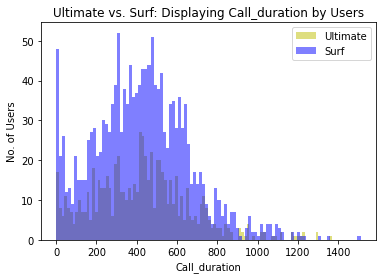

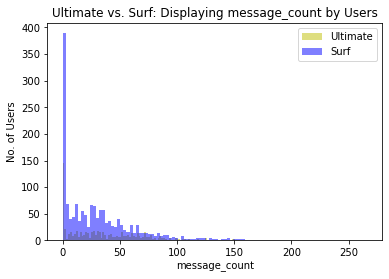

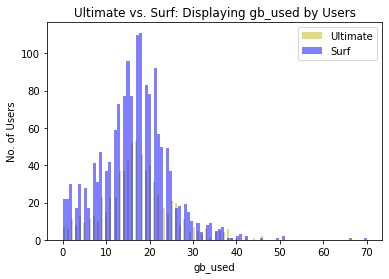

In [28]:
hist_list=['Call_duration', 'message_count', 'gb_used']
for param in hist_list:
    df_ultimate=df_merged_plan.loc[df_merged_plan.plan=='ultimate', param]
    df_surf=df_merged_plan.loc[df_merged_plan.plan=='surf', param]
    ##if(param =='Call_duration'):
     #   kwargs=dict(alpha=0.6,bins=100,density=True,stacked=True)
     #   ylabel='Frequency Density'
    #else:
    kwargs=dict(alpha=0.5,bins=100)
    ylabel='No. of Users'
    plt.hist(df_ultimate,**kwargs,color='y', label='Ultimate')
    plt.hist(df_surf,**kwargs,color='b', label='Surf')
    plt.gca().set(title='Ultimate vs. Surf: Displaying '+param+' by Users')
    plt.xlabel(param) 
    plt.ylabel(ylabel) 
    plt.legend()
    plt.show()
    


As we can see from the above graph, Surf users are dominating for every parameters but also there seems to have outliers so first we try to remove all those and then comapre the Histogrma again.

#### Conclusion: Comparison of Surf and Ultimate users:

**Call_duration:**
- As we can see from the graph above, In General most of the users uses calls duration between 250 and 620 minutes. In which  Surf users uses mostly between 300 to 600 min. while Ultimate users uses mostly 400 min.
- Very few users uses time more than 1000 min.
- There are more users of Surf plan.
<br><br>
**Messages:**
- Many of users does not sent messages at all.
- Surf users mostly sent messages between 1 to 50. while the most of the ultimate users sent berween 1 to 70. This is may be due to the condition that surf users got free messages till 50.
- There are more users of Surf plan.
<br><br>
**Gb_used**
- Most of the surf users uses internet between 15-25 gb. While the range is almost same for ultimate users as well.
- Very few users use internet more the 30 gb.
<br><br>
As we can see in the grapg there are outliers as well in the data so now we will try to remove the outliers and then see the graph again.


### Removing outliers.

Removing rows where all three parameters are 0. As I think there may be the customer who are very new and they have not even started to use the plan. So they wont be usefull to us to analyze the customer behaviours.

In [29]:
#pd.set_option('display.max_rows', None)
print('Data count before removing: ',len(df_merged_plan))
#display(len(df_merged_plan[df_merged_plan['Call_duration']==0]))
df_merged_plan_fil=df_merged_plan.loc[~((df_merged_plan['Call_duration']==0) & (df_merged_plan['message_count']==0) 
                           &(df_merged_plan['gb_used']==0))]
print('Data count after removing 0 calls_duration, messages and gb_used. ',len(df_merged_plan_fil))


Data count before removing:  2269
Data count after removing 0 calls_duration, messages and gb_used.  2256


In [30]:
df_merged_plan_fil

,user_id,month,Call_duration,Call_count,mb_used,gb_used,message_count,plan,total_monthly_revenue
0,1000,12,124.0,16,1901.47,2,11,ultimate,70.00
1,1001,8,182.0,22,6919.15,7,30,surf,20.00
2,1001,9,315.0,38,13314.82,14,44,surf,20.00
3,1001,10,393.0,47,22330.49,22,53,surf,90.09
4,1001,11,426.0,49,18504.30,19,36,surf,60.00
...,...,...,...,...,...,...,...,...,...
2251,1498,12,339.0,32,23137.69,23,0,surf,100.00
2252,1499,9,346.0,35,12984.76,13,0,surf,20.00
2253,1499,10,385.0,41,19492.43,20,0,surf,70.00
2254,1499,11,308.0,39,16813.83,17,0,surf,40.00


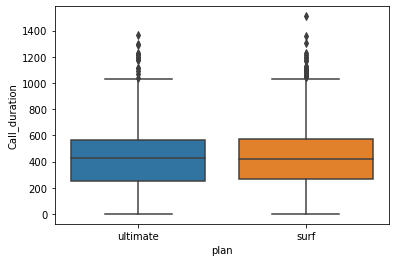

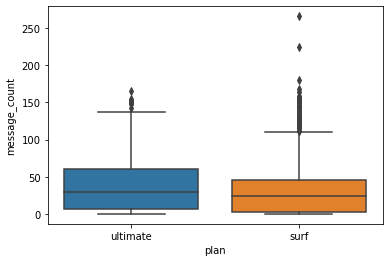

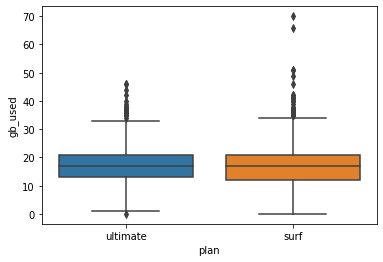

In [31]:
#Viewing outliers.
import seaborn as sns

ax=sns.boxplot(x='plan',y=df_merged_plan_fil['Call_duration'],data=df_merged_plan_fil)
plt.show()
ax=sns.boxplot(x='plan',y=df_merged_plan_fil['message_count'],data=df_merged_plan_fil )
plt.show()
ax=sns.boxplot(x='plan',y=df_merged_plan_fil['gb_used'] ,data=df_merged_plan_fil)
plt.show()

### Conclusion: Looking for outliers:
1. Call_Duration: For both the plans there are some users who are calling more than 1000 min.(upper limit is 1000 min.). So the outlier range for surf plan is 1000 to 1500 min. and for ultimate plan is 1000 to 1400 min. 

2. Message: Few outliers are there in ultimate as compare to surf users. 25% of all surf users sent more than 125 messages. and one of them send 275 message. So surf users has outlier range between 125 till 275 messages while for ultimate users outliers range is between 140 till 170. Also there are users who send 0 messages for surf plan.

3. Gb_used: For surf plan there are outliers range starts from approx.32 to 70 gb and for ultimate approx.31 to 46 gb.

In General, I can say that there are many outliers available in the data so we need to remove them before analyzing. 

As we can see above there are outliers available in each parameters. So using Z-Score we try to remove those outliers.

In [32]:
#Calculate zscore for the parameters.
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_merged_plan_fil[['Call_duration','message_count','gb_used']]))
#print(z)
threshold = 3
print(np.where(z > 3))

(array([  98,   99,  133,  211,  211,  244,  244,  349,  350,  351,  352,
        561,  615,  616,  617,  618,  619,  620,  621,  622,  922, 1023,
       1114, 1115, 1116, 1117, 1117, 1119, 1256, 1273, 1341, 1343, 1345,
       1384, 1468, 1469, 1471, 1472, 1487, 1489, 1490, 1491, 1492, 1493,
       1494, 1496, 1497, 1498, 1499, 1566, 1677, 1679, 1732, 1738, 1739,
       1740, 1743, 1744, 1747, 1908, 1910, 1936, 1938, 1997, 2131, 2132,
       2134, 2135, 2136, 2209], dtype=int64), array([2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0,
       0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1,
       1, 1, 1, 2], dtype=int64))


Below code will removing outliers.

In [33]:
df_merged_plan_fil_o = df_merged_plan_fil[(z < 3).all(axis=1)]
print(df_merged_plan_fil.shape)
print(df_merged_plan_fil_o.shape)


(2256, 9)
(2189, 9)


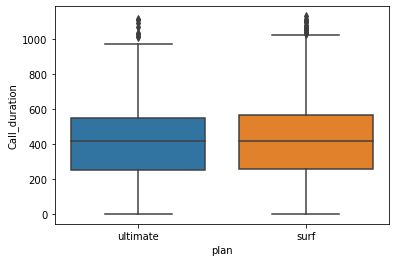

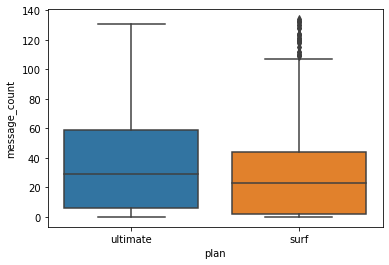

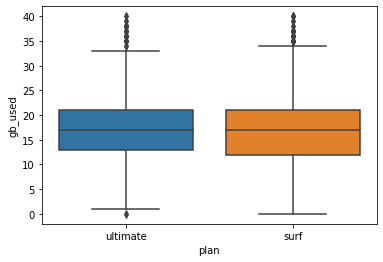

In [34]:
#Viewing outliers after deleting outliers.
import seaborn as sns
ax=sns.boxplot(x='plan',y=df_merged_plan_fil_o['Call_duration'],data=df_merged_plan_fil)
plt.show()
ax=sns.boxplot(x='plan',y=df_merged_plan_fil_o['message_count'] ,data=df_merged_plan_fil)
plt.show()
ax=sns.boxplot(x='plan',y=df_merged_plan_fil_o['gb_used'] ,data=df_merged_plan_fil)
plt.show()

### Histogram for the parameters (Call_duration, messages, gb_used) after removing outliers. 

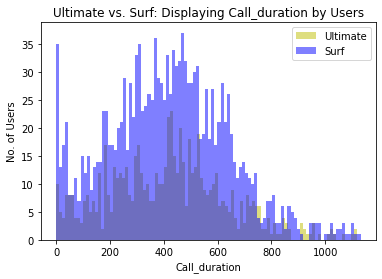

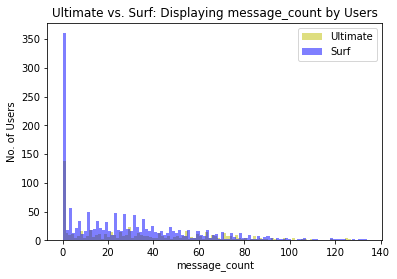

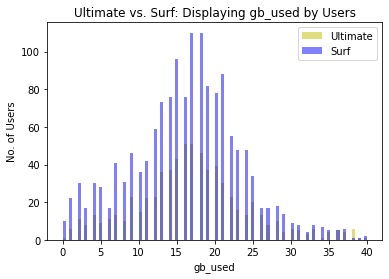

In [35]:
hist_list=['Call_duration', 'message_count', 'gb_used']
for param in hist_list:
    df_ultimate=df_merged_plan_fil_o.loc[df_merged_plan_fil_o.plan=='ultimate', param]
    df_surf=df_merged_plan_fil_o.loc[df_merged_plan_fil_o.plan=='surf', param]
    ##if(param =='Call_duration'):
     #   kwargs=dict(alpha=0.6,bins=100,density=True,stacked=True)
     #   ylabel='Frequency Density'
    #else:
    kwargs=dict(alpha=0.5,bins=100)
    ylabel='No. of Users'
    plt.hist(df_ultimate,**kwargs,color='y', label='Ultimate')
    plt.hist(df_surf,**kwargs,color='b', label='Surf')
    plt.gca().set(title='Ultimate vs. Surf: Displaying '+param+' by Users')
    plt.xlabel(param) 
    plt.ylabel(ylabel) 
    plt.legend()
    plt.show()
    

#### Conclusion: Comparison of Surf and Ultimate users after removal of outliers:

**Call_duration:**
- After removal of outliers, Max. range has been shorten. Its. has been set as approx. 1200. min.
- rest the analyses remains same as we found before the removal of outliers.
<br><br>
**Messages:**
- Data is not distributed normally. it is skewed to the right.
- Max range has been set to 120+. So now we can also say most of the users sent 40 to 50 messages in a month.
<br><br>
**Gb_used**
- This is somewhat normally distributed graph.
- Most of the users use between 14 to 21 gb.
- Max. range is now set to 40gb.
 

In [36]:
#hist_list=['Call_duration', 'message_count', 'gb_used']
#for param in hist_list:
 #   Q1=df_merged_plan_fil[param].quantile(0.25)
  #  Q3=df_merged_plan_fil[param].quantile(0.75)
   # IQR=Q3-Q1
    #quer=param+ '>=(@Q1-1.5*@IQR) & '+param+'<=(@Q3+1.5*@IQR)'
    #print ()
    #data_raw_fil=df_merged_plan_fil.query(quer)
    #print('Data count after removing outliers for '+ param+':' ,len(data_raw_fil))
    
df_merged_plan_fil_o.info()
print('###########################################################################################################')
print()
print('Surf Users Detail')
display(df_merged_plan_fil_o.loc[df_merged_plan_fil_o.plan=='surf'].describe())
print('###########################################################################################################')
print('Ultimate Users Detail')
display(df_merged_plan_fil_o.loc[df_merged_plan_fil_o.plan=='ultimate'].describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2189 entries, 0 to 2255
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2189 non-null   int64  
 1   month                  2189 non-null   int8   
 2   Call_duration          2189 non-null   float64
 3   Call_count             2189 non-null   int64  
 4   mb_used                2189 non-null   float64
 5   gb_used                2189 non-null   int32  
 6   message_count          2189 non-null   int32  
 7   plan                   2189 non-null   object 
 8   total_monthly_revenue  2189 non-null   float64
dtypes: float64(3), int32(2), int64(2), int8(1), object(1)
memory usage: 219.0+ KB
###########################################################################################################

Surf Users Detail


,user_id,month,Call_duration,Call_count,mb_used,gb_used,message_count,total_monthly_revenue
count,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000,1505.000000
mean,1240.449169,9.118272,416.742857,46.958804,16132.393874,16.257807,28.596013,56.831920
std,138.873111,2.479832,223.306850,24.771985,7392.084981,7.241556,28.955078,47.073006
min,1001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,1120.000000,8.000000,259.000000,30.000000,11830.350000,12.000000,2.000000,20.000000
50%,1241.000000,10.000000,415.000000,47.000000,16651.620000,17.000000,23.000000,40.000000
75%,1357.000000,11.000000,564.000000,63.000000,20653.770000,21.000000,44.000000,80.000000
max,1499.000000,12.000000,1131.000000,125.000000,40217.220000,40.000000,134.000000,273.510000


###########################################################################################################
Ultimate Users Detail


,user_id,month,Call_duration,Call_count,mb_used,gb_used,message_count,total_monthly_revenue
count,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000
mean,1253.059942,9.099415,415.878655,47.035088,16839.725102,16.944444,35.204678,71.821637
std,151.159688,2.576854,222.087313,24.749970,7640.291374,7.468027,31.681831,8.809206
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000
25%,1126.000000,7.000000,251.000000,29.000000,12525.610000,13.000000,5.750000,70.000000
50%,1237.000000,10.000000,420.000000,47.500000,16569.125000,17.000000,29.000000,70.000000
75%,1401.000000,11.000000,548.500000,63.000000,20710.742500,21.000000,59.000000,70.000000
max,1497.000000,12.000000,1117.000000,132.000000,40388.210000,40.000000,131.000000,140.000000


### Conclusion:
**The Mean of Surf and Ultimate users are (approx):**.
- Call_Duration: The Mean values of both plan are 416 and 415 which is approx same. So we can say on an average users of both plan are using 415 min. per month. Also if we compare the mean with median we found median is more than mean for ultimate and almost equal to surf users. That's mean  there are more users of ultimate plan who spending less minutes. 
- Messages: The Mean values of both the plan are 28 and 35. thats conclude that the users of surf plan send less messages on avg. as compare to ultimate plan. Also median values are 23 and 29. For both the plan Median are less than mean that's mean more data available for those users who send more messages.
- Gb_used: Mean of both plan are almost same. So plan type does not effect the internet usage.<br><br>
**The Standard Deviation of Surf and Ultimate users are (approx):**.
- Call_Duration: Approx 223 and 222. Std. Dev are almost equal for both plan. This also revels that there is high deviation in calls duration w.r.t to mean values of both users.
- Messages: 28 and 31. The std. dev. is high. It revels that how much each data differs from the mean of messages.
- Gb_used: Approx. 7 for both plan. The deviation is equal for both users. Now each data is deviated by 7 gb w.r.t mean for each type users.



### Conclusion

1. <b>Comparison of Call_duration between Ultimate and Surf Users:</b> Now after removing outliers, Graph looks somewhat normally distributed except the records which are there for 0 call_duration. Also we can see thet Surf users are dominating in comaprison to ultimate users for call_duration.  
2. <b>Comparison of message_count between Ultimate and Surf Users:</b> This graph shows that data is skewed to the right. And also Surf users again dominate the Ultimate Users.
3. <b>Comparison of gb_used between Ultimate and Surf Users:</b> Data is normally distributed. And as in all above case Surf Users are using the internet more than Ultimate Users.


## Step 4. Test the hypotheses

### The average revenue from users of Ultimate and Surf calling plans differs.

In [37]:
#Test the hypotheses.
from scipy import stats as st
import numpy as np

surf_user_monthly_revenue=df_merged_plan_fil_o.loc[df_merged_plan_fil_o.plan=='surf']['total_monthly_revenue']
ultimate_user_monthly_revenue=df_merged_plan_fil_o.loc[df_merged_plan_fil_o.plan=='ultimate']['total_monthly_revenue']
print('Variance of Surf Users ', surf_user_monthly_revenue.var())
print('Variance of Ultimate Users ',ultimate_user_monthly_revenue.var())

#print(surf_user_monthly_revenue.head())
#print(ultimate_user_monthly_revenue.head())

alpha = .05 # critical statistical significance level
results = st.ttest_ind(
        surf_user_monthly_revenue, 
        ultimate_user_monthly_revenue,equal_var=False)#We pas equal_var as False as the variance of both sample are not equal.
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

print('Avg. revenue from Surf Users: {0}'.format(surf_user_monthly_revenue.mean()))   
print('Avg. revenue from Ultimate Users: {0}'.format(ultimate_user_monthly_revenue.mean()))


Variance of Surf Users  2215.867905685143
Variance of Ultimate Users  77.6021080030502
p-value:  1.8746664246466472e-31
We reject the null hypothesis
Avg. revenue from Surf Users: 56.83192026578063
Avg. revenue from Ultimate Users: 71.82163742690058


### Conclusion
As we have two statistical populations here which are based on same samples so we apply the method scipy.stats.ttest_ind(array1, array2, equal_var).<br/>
In this scenario, We have the following hypothesis:<br/>
**Null Hypothesis H0:** The average revenue from users of Ultimate and Surf calling plans does not differs.
<br/>
**Alternative Hypothesis H1:** The average revenue from users of Ultimate and Surf calling plans differs.
<br/>
After examine the p-value, We can say that we have to reject the null hypothesis, which implies average revenue from users of Ultimate and Surf calling plans differs.

### The average revenue from users in NY-NJ area is different from that of the users from other regions.

In [38]:
#Test the hypotheses.
from scipy import stats as st
import numpy as np
df_users['city']=df_users['city'].str.lower()
df_users['city'].value_counts()
df_ny_nj_users=df_users[df_users['city'].str.contains('|'.join(['ny-nj','ny','nj']))]
df_ny_nj_users_merg= df_merged_plan_fil_o.loc[(df_merged_plan_fil_o.user_id.isin(df_ny_nj_users['user_id']))]
df_except_nynj_users_merg=df_merged_plan_fil_o.loc[~(df_merged_plan_fil_o.user_id.isin(df_ny_nj_users['user_id']))]

print('Variance of Surf Users ', df_ny_nj_users_merg['total_monthly_revenue'].var())
print('Variance of Ultimate Users ',df_except_nynj_users_merg['total_monthly_revenue'].var())
alpha = .05 # critical statistical significance level
results = st.ttest_ind(
        df_ny_nj_users_merg['total_monthly_revenue'], 
        df_except_nynj_users_merg['total_monthly_revenue'],equal_var=False)#We pas equal_var as False as the variance of both sample are not equal.
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis") 

print('Avg. revenue from users in NY-NJ area: {0}'.format(df_ny_nj_users_merg['total_monthly_revenue'].mean()))   
print('Avg. revenue from users not in NY-NJ area: {0}'.format(df_except_nynj_users_merg['total_monthly_revenue'].mean()))


Variance of Surf Users  2016.0609272791858
Variance of Ultimate Users  1470.9665908066115
p-value:  0.7805819585361078
We can't reject the null hypothesis
Avg. revenue from users in NY-NJ area: 61.0422619047619
Avg. revenue from users not in NY-NJ area: 61.65741246290798


### Conclusion
As we have two statistical populations here which are based on same samples so we apply the method scipy.stats.ttest_ind(array1, array2, equal_var).<br/>
In this scenario, We have the following hypothesis:<br/>
**Null Hypothesis H0:** The average revenue from users in NY-NJ area is not different from that of the users from other regions.
<br/>
**Alternative Hypothesis H1:** The average revenue from users in NY-NJ area is different from that of the users from other regions.
<br/>
After examine the p-value, We can say that we can't reject the null hypothesis, which implies that average revenue from users in NY-NJ area is not different from that of the users from other regions.
We also have calculated the avg. revenues of both the regions and found no such difference.

## Step 5. Write an overall conclusion

In [39]:
#df_merged_plan_fil_o.loc[df_merged_plan_fil_o.plan='Surf', ]
df_merged_plan_fil_o_pvt=df_merged_plan_fil_o.pivot_table(
    index='month', columns='plan', values='total_monthly_revenue', aggfunc='mean').reset_index()

#df_merged_plan_fil_o_pvt.columns=['month','Total_Revenue_Surf','Total_Revenue_Ultimate']
print(df_merged_plan_fil_o_pvt)

plan  month       surf   ultimate
0         1  20.000000  70.000000
1         2  34.396667  70.000000
2         3  45.941304  74.666667
3         4  40.710600  73.000000
4         5  45.848684  70.750000
5         6  49.276289  71.673913
6         7  60.035085  71.964912
7         8  59.784551  72.985294
8         9  56.127737  72.187500
9        10  62.242578  71.303922
10       11  55.813704  71.099174
11       12  61.165779  71.978261


Text(0, 0.5, 'Total Monthly Revenue')

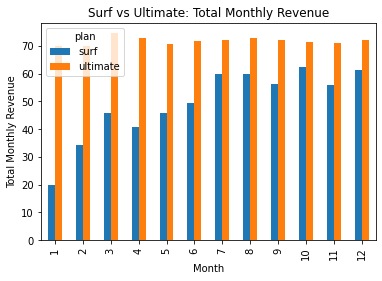

In [40]:
df_merged_plan_fil_o_pvt.plot(kind="bar", title='Surf vs Ultimate: Total Monthly Revenue',x='month')
plt.xlabel("Month")
plt.ylabel("Total Monthly Revenue")

**As we can see from the above graph that average monthly revenue is more for ultimate users**.
So now I can conclude that ultimate plan bring more revenues so will recommend to our commercial department to adjust the advertising budget on this plan more. 
Also during analyzing we found some data which needs further investigation like: some records of calls, messages and gb_used which were recorded after deregistration by users. we store them in seprate table and will share with the team to find the cause for that.

### Conclusion:


1. If we see the average monthly revenue, We find avg. revenue from Surf plan is approx.57 and for Ultimate is approx.72. so it shows that on an average monthly revenues are more for ultimate users.
So now I can conclude that Ultimate plan bring more revenues so will recommend to our commercial department to adjust the advertising budget on ultimate plan more. 

2. Also during analyzing we found some data which needs further investigation like: some records of calls, messages and gb_used which were recorded after deregistration by users. we store them in seprate table and will share with the team to find the cause for that.

### Conclusion
1. Data was scatter in multiple tables, so we first checked inidvidual table for any invalid data and then merged all tables in single.
2. We removed invalid data from calls, messages and internet table We calculated the invalid data on basis of chur_date. One think I have noticed here that there are lots of invalid data available in these tables for which duration is greater than 0 (i.e. the calls, message and gb_used date is greater than the churn date) so we need to check with the team how users are able to call after deregistration and who will pay for that?
3. After merging, we also added some column for analyzing purpose. like total_monthly_revenue.
4. As our analysis should be focused on surf and ultimate user's behaviour so we separate all the data in two types of plan and then check all the three parameters(call_duration, message count and gb_used) for both types of users.
5. After plotting the box plot we identified that there are some outiers available in the data so first I try to delete them and then made analysis.
6.  After deleting the outlier: I calculated Mean, Variance and std. dev. of all three parameters for both users. The mean value of call_duration of both the plan are almost same i.e. 416 and 415. About messages I can that users are not much interested in using messages service as most of them are not even using all the free messages specially for ultimate users. Mean of gb_used is almost same for both type of users i.e approx 17. 
7. In the section 'Test the hypotheses', we got proved that avg. revenue from the users of ultimpate and surf plan are differs. 
8. we also plotted the bar graph of avg. monthly reveue of both the users, which concluded that average monthly revenue is more for ultimate users than surf users. <br>
**The avg. revenue from Surf plan is approx.57 and for Ultimate is approx.72.**<br>
**So now I can conclude that Ultimate plan bring more revenues so will recommend to our commercial department to adjust the advertising budget on ultimate plan more.**